# Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

# Define Model

In [2]:
class linear:
  def __init__(self, input_dim, output_dim):
    self.input_dim = input_dim
    self.output_dim = output_dim
    self.w = np.random.randn(input_dim, output_dim)
    self.gradient = np.zeros_like(self.w)

  def forward(self, x):
    self.input = x
    out = x @ self.w
    return out

  def backprop(self, loss):
    self.gradient = self.input.T @ loss

    loss = loss @ self.w.T
    return loss

  def update(self, lr):
    self.w -= lr * self.gradient

In [3]:
class sigmoid:
  def __init__(self):
    pass

  def forward(self, x):
    self.input = x
    return 1.0 / (1.0+np.exp(-x))

  def backprop(self, loss):
    derivative_sig = self.forward(self.input) * (1-self.forward(self.input))
    return derivative_sig * loss

In [30]:
class tanh:
  def __init__(self):
    pass

  def forward(self, x):
    self.input = x
    return np.tanh(x)

  def backprop(self, loss):
    derivative_tanh = 1.0 / (np.cosh(self.input)**2)
    return derivative_tanh * loss

In [15]:
class Model:
  def __init__(self, input_dim=2, hidden_dim=10, output_dim=1, ACT='Sigmoid'):
    self.fc1 = linear(input_dim, hidden_dim)
    self.fc2 = linear(hidden_dim, hidden_dim)
    self.fc3 = linear(hidden_dim, output_dim)

    self.ACT = ACT
    self.w_act = 1
    if self.ACT == 'Sigmoid':
      self.act1 = sigmoid()
      self.act2 = sigmoid()
      self.act3 = sigmoid()
    elif self.ACT == 'tanh':
      self.act1 = tanh()
      self.act2 = tanh()
      self.act3 = tanh()
    else:
      self.w_act = 0

  def forward(self, x):
    out = self.fc1.forward(x)
    if self.w_act:
      out = self.act1.forward(out)
    out = self.fc2.forward(out)
    if self.w_act:
      out = self.act2.forward(out)
    out = self.fc3.forward(out)
    if self.w_act:
      out = self.act3.forward(out)

    return out

  def CrossEntropyLoss(self, pred, label):
    loss = -(label*np.log2(pred) + (1.0-label)*np.log2(1-pred))
    derivative_loss = -label*(1/pred) + (1-label)*(1/(1-pred))
    return loss, derivative_loss
  
  def MSELoss(self, pred, label):
    loss = (pred - label) ** 2
    derivative_loss = 2 * (pred - label)
    return loss, derivative_loss

  def backprop(self, derivative_loss):
    if self.w_act:
      derivative_loss = self.act3.backprop(derivative_loss)
    derivative_loss = self.fc3.backprop(derivative_loss)
    if self.w_act:
      derivative_loss = self.act2.backprop(derivative_loss)
    derivative_loss = self.fc2.backprop(derivative_loss)
    if self.w_act:
      derivative_loss = self.act1.backprop(derivative_loss)
    derivative_loss = self.fc1.backprop(derivative_loss)
  
  def update(self, lr):
    self.fc1.update(lr)
    self.fc2.update(lr)
    self.fc3.update(lr)

  def accuracy(self, pred, label):
    return np.sum(np.round(pred)==label) / label.shape[0]

In [6]:
def generate_linear(n=100):
  pts = np.random.uniform(0, 1, (n, 2))
  inputs = []
  labels = []
  for pt in pts:
    inputs.append([pt[0], pt[1]])
    # distance = (pt[0]-pt[1]) / 1.414
    if pt[0] > pt[1]:
      labels.append(0)
    else:
      labels.append(1)
  return np.array(inputs), np.array(labels).reshape(n, 1)

In [7]:
def generate_XOR_easy():
  inputs = []
  labels = []

  for i in range(11):
    inputs.append([0.1*i, 0.1*i])
    labels.append(0)

    if 0.1*i == 0.5:
      continue

    inputs.append([0.1*i, 1-0.1*i])
    labels.append(1)

  return np.array(inputs), np.array(labels).reshape(21, 1)

In [8]:
def show_result(x, y, pred_y):
  import matplotlib.pyplot as plt
  plt.subplot(1, 2, 1) # 1 row, 1 column
  plt.title('Ground truth', fontsize=18)
  for i in range(x.shape[0]):
    if y[i] == 0:
      plt.plot(x[i][0], x[i][1], 'ro')
    else:
      plt.plot(x[i][0], x[i][1], 'bo')
  
  plt.subplot(1, 2, 2)
  plt.title ('Predict result', fontsize=18)
  for i in range(x.shape[0]):
    if pred_y[i] == 0:
      plt.plot(x[i][0], x[i][1], 'ro')
    else:
      plt.plot(x[i][0], x[i][1], 'bo')

  plt.show()

In [9]:
def show_learning_curve(loss):
  plt.title('Learning curve', fontsize=18)
  plt.ylabel('loss')
  plt.xlabel('Epoch')

  epoch = np.array([x+1 for x in range(len(loss))])
  plt.plot(epoch*5000, loss)

  plt.show()

# Linear

In [ ]:
# hyperparameters
epoch_num = 100000
lr = 0.001

In [ ]:
# Train
# prepare data
train_x, train_y = generate_linear(100)
# create model
model = Model()
loss_curve = []
start = time.time()

for epoch in range(epoch_num):
  # Forward pass
  pred_y = model.forward(train_x)
  # Backward pass
  loss, derivative_loss = model.CrossEntropyLoss(pred_y, train_y)
  model.backprop(derivative_loss)
  # Update weights
  model.update(lr)

  # print state
  if (epoch+1) % 5000 == 0:
    total_loss = np.sum(loss)/train_x.shape[0]
    loss_curve.append(total_loss)
    acc = model.accuracy(pred_y, train_y)
    train_time = int(time.time() - start)
    print(f'epoch {epoch+1:5d} loss: {total_loss:7.5f} accuracy: {acc:.2%} time: {train_time:3d} sec')

epoch  5000 loss: 0.07245 accuracy: 100.00% time:   1 sec
epoch 10000 loss: 0.03912 accuracy: 100.00% time:   2 sec
epoch 15000 loss: 0.02476 accuracy: 100.00% time:   5 sec
epoch 20000 loss: 0.01718 accuracy: 100.00% time:   8 sec
epoch 25000 loss: 0.01273 accuracy: 100.00% time:  12 sec
epoch 30000 loss: 0.00989 accuracy: 100.00% time:  14 sec
epoch 35000 loss: 0.00796 accuracy: 100.00% time:  15 sec
epoch 40000 loss: 0.00659 accuracy: 100.00% time:  17 sec
epoch 45000 loss: 0.00557 accuracy: 100.00% time:  18 sec
epoch 50000 loss: 0.00479 accuracy: 100.00% time:  19 sec
epoch 55000 loss: 0.00418 accuracy: 100.00% time:  21 sec
epoch 60000 loss: 0.00369 accuracy: 100.00% time:  22 sec
epoch 65000 loss: 0.00329 accuracy: 100.00% time:  23 sec
epoch 70000 loss: 0.00296 accuracy: 100.00% time:  25 sec
epoch 75000 loss: 0.00269 accuracy: 100.00% time:  26 sec
epoch 80000 loss: 0.00245 accuracy: 100.00% time:  27 sec
epoch 85000 loss: 0.00225 accuracy: 100.00% time:  29 sec
epoch 90000 lo

In [ ]:
# Test
test_x, test_y = generate_linear()
pred_y = model.forward(test_x)
acc = model.accuracy(pred_y, test_y)
print(f'Linear predict:\n{pred_y}')
print(f'Linear accuracy : {acc:.2%}')

Linear predict:
[[1.43510935e-11]
 [5.80406958e-12]
 [1.00000000e+00]
 [7.44829632e-12]
 [1.00000000e+00]
 [1.60078015e-11]
 [6.93161641e-09]
 [8.80987351e-11]
 [5.50176120e-12]
 [1.23593363e-08]
 [1.00000000e+00]
 [5.96255962e-12]
 [1.85372320e-05]
 [1.00000000e+00]
 [1.00000000e+00]
 [7.05001724e-12]
 [9.99991143e-01]
 [6.07197956e-12]
 [5.75929246e-12]
 [9.37003098e-12]
 [9.99999984e-01]
 [9.99999393e-01]
 [7.78196505e-12]
 [1.00000000e+00]
 [1.40402451e-09]
 [9.99999951e-01]
 [1.00000000e+00]
 [6.40546024e-12]
 [1.00000000e+00]
 [1.00000000e+00]
 [9.99999999e-01]
 [9.19805267e-04]
 [1.00000000e+00]
 [1.50851944e-11]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.09829490e-11]
 [5.83737829e-01]
 [9.96150916e-01]
 [1.00000000e+00]
 [7.22817645e-12]
 [5.72923357e-11]
 [9.99988518e-01]
 [1.00000000e+00]
 [1.11460485e-11]
 [1.72574561e-11]
 [9.99999886e-01]
 [3.35302363e-11]
 [7.48582586e-11]
 [6.23690650e-12]
 [1.00000000e+00]
 [6.97013054e-04]
 [3.58388460e-11]
 [5.77027083e-11]
 [7.02127346

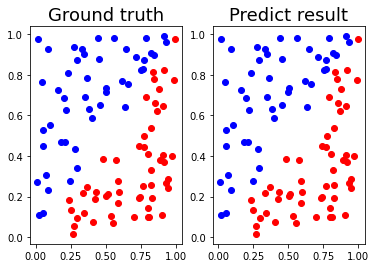

In [ ]:
# draw result picture
show_result(test_x, test_y, np.round(pred_y))

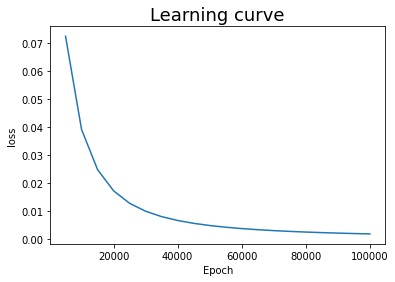

In [ ]:
# draw learning curve
show_learning_curve(loss_curve)

# XOR

In [ ]:
# hyperparameters
epoch_num = 100000
lr = 0.001

In [ ]:
# Train
# prepare data
train_x, train_y = generate_XOR_easy()
# create model
model = Model()
loss_curve = []
start = time.time()

for epoch in range(epoch_num):
  # Forward pass
  pred_y = model.forward(train_x)
  # Backward pass
  loss, derivative_loss = model.CrossEntropyLoss(pred_y, train_y)
  model.backprop(derivative_loss)
  # Update weights
  model.update(lr)

  # print state
  if (epoch+1) % 5000 == 0:
    total_loss = np.sum(loss)/train_x.shape[0]
    loss_curve.append(total_loss)
    acc = model.accuracy(pred_y, train_y)
    train_time = int(time.time() - start)
    print(f'epoch {epoch+1:5d} loss: {total_loss:7.5f} accuracy: {acc:.2%} time: {train_time:5d} sec')

epoch  5000 loss: 0.94267 accuracy: 71.43% time:     0 sec
epoch 10000 loss: 0.75885 accuracy: 80.95% time:     1 sec
epoch 15000 loss: 0.45125 accuracy: 90.48% time:     2 sec
epoch 20000 loss: 0.23779 accuracy: 95.24% time:     2 sec
epoch 25000 loss: 0.13271 accuracy: 100.00% time:     3 sec
epoch 30000 loss: 0.08109 accuracy: 100.00% time:     4 sec
epoch 35000 loss: 0.05468 accuracy: 100.00% time:     4 sec
epoch 40000 loss: 0.03989 accuracy: 100.00% time:     5 sec
epoch 45000 loss: 0.03082 accuracy: 100.00% time:     6 sec
epoch 50000 loss: 0.02482 accuracy: 100.00% time:     7 sec
epoch 55000 loss: 0.02063 accuracy: 100.00% time:     7 sec
epoch 60000 loss: 0.01755 accuracy: 100.00% time:     8 sec
epoch 65000 loss: 0.01521 accuracy: 100.00% time:     9 sec
epoch 70000 loss: 0.01338 accuracy: 100.00% time:     9 sec
epoch 75000 loss: 0.01192 accuracy: 100.00% time:    10 sec
epoch 80000 loss: 0.01073 accuracy: 100.00% time:    11 sec
epoch 85000 loss: 0.00974 accuracy: 100.00% 

In [ ]:
# Test
test_x, test_y = generate_XOR_easy()
pred_y = model.forward(test_x)
acc = model.accuracy(pred_y, test_y)
print(f'XOR predict:\n{pred_y}')
print(f'XOR accuracy : {acc:.2%}')

XOR predict:
[[2.78711088e-04]
 [9.98017977e-01]
 [1.16170694e-03]
 [9.97778979e-01]
 [3.53414147e-03]
 [9.97238478e-01]
 [6.63308652e-03]
 [9.95937136e-01]
 [8.36462959e-03]
 [9.81255829e-01]
 [8.20212283e-03]
 [6.98710644e-03]
 [9.75612585e-01]
 [5.53459540e-03]
 [9.98105581e-01]
 [4.23854668e-03]
 [9.98879145e-01]
 [3.20816103e-03]
 [9.99024958e-01]
 [2.43021937e-03]
 [9.99056436e-01]]
XOR accuracy : 100.00%


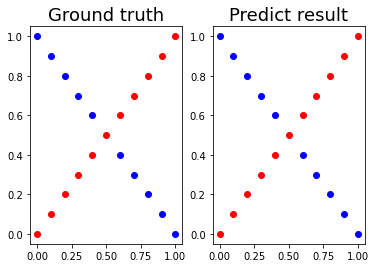

In [ ]:
# draw result picture
show_result(test_x, test_y, np.round(pred_y))

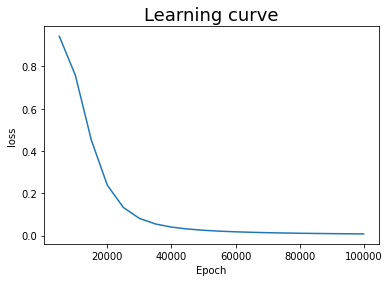

In [ ]:
# draw learning curve
show_learning_curve(loss_curve)

# Discusion

## Learing Rate = 0.00001

In [ ]:
# hyperparameters
epoch_num = 100000
lr = 0.00001

In [ ]:
# Train
# prepare data
train_x, train_y = generate_linear(100)
# create model
model = Model()
loss_curve = []
start = time.time()

for epoch in range(epoch_num):
  # Forward pass
  pred_y = model.forward(train_x)
  # Backward pass
  loss, derivative_loss = model.CrossEntropyLoss(pred_y, train_y)
  model.backprop(derivative_loss)
  # Update weights
  model.update(lr)

  # print state
  if (epoch+1) % 5000 == 0:
    total_loss = np.sum(loss)/train_x.shape[0]
    loss_curve.append(total_loss)
    acc = model.accuracy(pred_y, train_y)
    train_time = int(time.time() - start)
    print(f'epoch {epoch+1:5d} loss: {total_loss:7.5f} accuracy: {acc:.2%} time: {train_time:3d} sec')

epoch  5000 loss: 0.99885 accuracy: 52.00% time:   1 sec
epoch 10000 loss: 0.97775 accuracy: 53.00% time:   2 sec
epoch 15000 loss: 0.95627 accuracy: 58.00% time:   4 sec
epoch 20000 loss: 0.93308 accuracy: 65.00% time:   5 sec
epoch 25000 loss: 0.90694 accuracy: 78.00% time:   6 sec
epoch 30000 loss: 0.87667 accuracy: 79.00% time:   7 sec
epoch 35000 loss: 0.84118 accuracy: 84.00% time:   9 sec
epoch 40000 loss: 0.79969 accuracy: 87.00% time:  10 sec
epoch 45000 loss: 0.75201 accuracy: 91.00% time:  11 sec
epoch 50000 loss: 0.69890 accuracy: 94.00% time:  13 sec
epoch 55000 loss: 0.64218 accuracy: 97.00% time:  14 sec
epoch 60000 loss: 0.58448 accuracy: 98.00% time:  15 sec
epoch 65000 loss: 0.52857 accuracy: 99.00% time:  17 sec
epoch 70000 loss: 0.47673 accuracy: 99.00% time:  18 sec
epoch 75000 loss: 0.43027 accuracy: 99.00% time:  19 sec
epoch 80000 loss: 0.38961 accuracy: 99.00% time:  21 sec
epoch 85000 loss: 0.35454 accuracy: 99.00% time:  22 sec
epoch 90000 loss: 0.32449 accur

In [ ]:
# Test
test_x, test_y = generate_linear()
pred_y = model.forward(test_x)
acc = model.accuracy(pred_y, test_y)
print(f'Linear predict:\n{pred_y}')
print(f'Linear accuracy : {acc:.2%}')

Linear predict:
[[0.08696538]
 [0.9675251 ]
 [0.46583731]
 [0.18556066]
 [0.44394635]
 [0.87917322]
 [0.8242231 ]
 [0.50839185]
 [0.01392587]
 [0.16795465]
 [0.24631602]
 [0.7654037 ]
 [0.30828942]
 [0.18795594]
 [0.33540787]
 [0.81106152]
 [0.01215677]
 [0.95808108]
 [0.13462089]
 [0.33574974]
 [0.93966775]
 [0.95191758]
 [0.78381044]
 [0.94940036]
 [0.81582852]
 [0.02671763]
 [0.91466365]
 [0.13137962]
 [0.05238792]
 [0.33682181]
 [0.85894918]
 [0.83917856]
 [0.89856037]
 [0.86894957]
 [0.01694992]
 [0.89113014]
 [0.91856636]
 [0.02160443]
 [0.01689505]
 [0.70254889]
 [0.08633552]
 [0.07842293]
 [0.19665671]
 [0.83542988]
 [0.01945917]
 [0.85721521]
 [0.49671628]
 [0.3591728 ]
 [0.02199846]
 [0.96017222]
 [0.60691426]
 [0.79322324]
 [0.88979461]
 [0.73822843]
 [0.04008396]
 [0.12316664]
 [0.29456399]
 [0.18454436]
 [0.77993439]
 [0.9083849 ]
 [0.13236059]
 [0.86143173]
 [0.03647965]
 [0.97159292]
 [0.07829103]
 [0.01301286]
 [0.95371879]
 [0.13971316]
 [0.75026193]
 [0.06373097]
 [0.

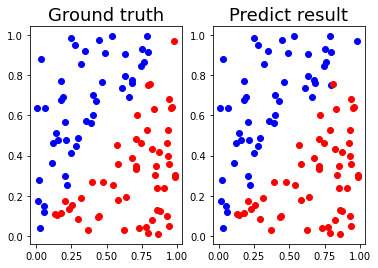

In [ ]:
# draw result picture
show_result(test_x, test_y, np.round(pred_y))

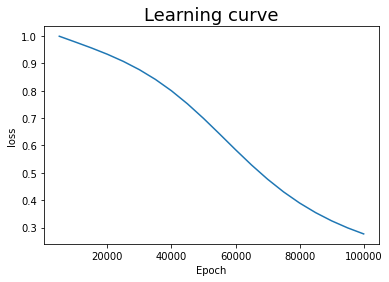

In [ ]:
# draw learning curve
show_learning_curve(loss_curve)

## Learning Rate = 0.1

In [ ]:
# hyperparameters
epoch_num = 100000
lr = 0.1

In [ ]:
# Train
# prepare data
train_x, train_y = generate_linear(100)
# create model
model = Model()
loss_curve = []
start = time.time()

for epoch in range(epoch_num):
  # Forward pass
  pred_y = model.forward(train_x)
  # Backward pass
  loss, derivative_loss = model.CrossEntropyLoss(pred_y, train_y)
  model.backprop(derivative_loss)
  # Update weights
  model.update(lr)

  # print state
  if (epoch+1) % 5000 == 0:
    total_loss = np.sum(loss)/train_x.shape[0]
    loss_curve.append(total_loss)
    acc = model.accuracy(pred_y, train_y)
    train_time = int(time.time() - start)
    print(f'epoch {epoch+1:5d} loss: {total_loss:7.5f} accuracy: {acc:.2%} time: {train_time:3d} sec')

epoch  5000 loss: 0.00026 accuracy: 100.00% time:   1 sec
epoch 10000 loss: 0.00010 accuracy: 100.00% time:   2 sec
epoch 15000 loss: 0.00006 accuracy: 100.00% time:   4 sec
epoch 20000 loss: 0.00004 accuracy: 100.00% time:   5 sec
epoch 25000 loss: 0.00003 accuracy: 100.00% time:   6 sec
epoch 30000 loss: 0.00002 accuracy: 100.00% time:   8 sec
epoch 35000 loss: 0.00002 accuracy: 100.00% time:   9 sec
epoch 40000 loss: 0.00002 accuracy: 100.00% time:  10 sec
epoch 45000 loss: 0.00001 accuracy: 100.00% time:  11 sec
epoch 50000 loss: 0.00001 accuracy: 100.00% time:  13 sec
epoch 55000 loss: 0.00001 accuracy: 100.00% time:  14 sec
epoch 60000 loss: 0.00001 accuracy: 100.00% time:  15 sec
epoch 65000 loss: 0.00001 accuracy: 100.00% time:  17 sec
epoch 70000 loss: 0.00001 accuracy: 100.00% time:  18 sec
epoch 75000 loss: 0.00001 accuracy: 100.00% time:  19 sec
epoch 80000 loss: 0.00001 accuracy: 100.00% time:  21 sec
epoch 85000 loss: 0.00001 accuracy: 100.00% time:  22 sec
epoch 90000 lo

In [ ]:
# Test
test_x, test_y = generate_linear()
pred_y = model.forward(test_x)
acc = model.accuracy(pred_y, test_y)
print(f'Linear predict:\n{pred_y}')
print(f'Linear accuracy : {acc:.2%}')

Linear predict:
[[9.99999998e-01]
 [3.64224788e-09]
 [9.99999998e-01]
 [9.99999998e-01]
 [9.99999998e-01]
 [5.68160291e-05]
 [9.99999998e-01]
 [2.12271459e-09]
 [9.99999998e-01]
 [9.99999998e-01]
 [9.99999998e-01]
 [2.50538804e-09]
 [9.99999998e-01]
 [9.99999998e-01]
 [3.49567934e-09]
 [2.44621021e-09]
 [9.99999998e-01]
 [2.25538734e-09]
 [9.99999998e-01]
 [9.99999998e-01]
 [9.99999998e-01]
 [5.31378959e-07]
 [2.44986760e-09]
 [9.99999998e-01]
 [2.82105237e-09]
 [9.99999998e-01]
 [9.99999998e-01]
 [3.08714430e-09]
 [9.99999998e-01]
 [2.16111224e-09]
 [9.99999998e-01]
 [2.25811752e-09]
 [2.51034735e-09]
 [9.99999070e-01]
 [2.44745076e-09]
 [9.99999981e-01]
 [9.99999998e-01]
 [2.76248958e-09]
 [2.53931672e-09]
 [2.18398552e-09]
 [9.99999998e-01]
 [3.01613836e-09]
 [2.33795975e-09]
 [9.99999998e-01]
 [9.99999998e-01]
 [9.99999998e-01]
 [2.37721687e-09]
 [3.03587560e-09]
 [2.38013197e-09]
 [9.99999998e-01]
 [2.29620599e-09]
 [2.55368176e-09]
 [2.49607497e-09]
 [9.99999998e-01]
 [9.99999998

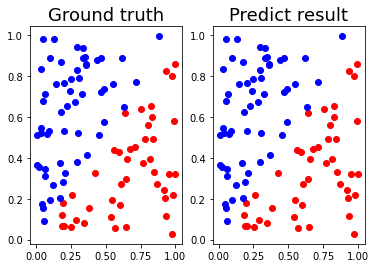

In [ ]:
# draw result picture
show_result(test_x, test_y, np.round(pred_y))

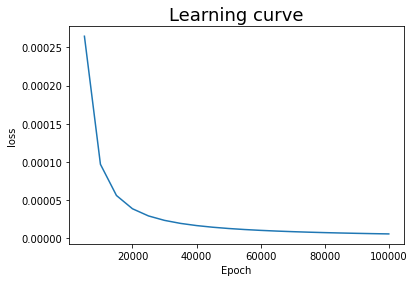

In [ ]:
# draw learning curve
show_learning_curve(loss_curve)

## 2 hidden units

In [ ]:
# hyperparameters
epoch_num = 100000
lr = 0.001

In [ ]:
# Train
# prepare data
train_x, train_y = generate_linear(100)
# create model
model = Model(hidden_dim=2)
loss_curve = []
start = time.time()

for epoch in range(epoch_num):
  # Forward pass
  pred_y = model.forward(train_x)
  # Backward pass
  loss, derivative_loss = model.CrossEntropyLoss(pred_y, train_y)
  model.backprop(derivative_loss)
  # Update weights
  model.update(lr)

  # print state
  if (epoch+1) % 5000 == 0:
    total_loss = np.sum(loss)/train_x.shape[0]
    loss_curve.append(total_loss)
    acc = model.accuracy(pred_y, train_y)
    train_time = int(time.time() - start)
    print(f'epoch {epoch+1:5d} loss: {total_loss:7.5f} accuracy: {acc:.2%} time: {train_time:3d} sec')

epoch  5000 loss: 0.07400 accuracy: 100.00% time:   0 sec
epoch 10000 loss: 0.03333 accuracy: 100.00% time:   1 sec
epoch 15000 loss: 0.02165 accuracy: 100.00% time:   2 sec
epoch 20000 loss: 0.01605 accuracy: 100.00% time:   3 sec
epoch 25000 loss: 0.01269 accuracy: 100.00% time:   3 sec
epoch 30000 loss: 0.01040 accuracy: 100.00% time:   4 sec
epoch 35000 loss: 0.00873 accuracy: 100.00% time:   5 sec
epoch 40000 loss: 0.00745 accuracy: 100.00% time:   5 sec
epoch 45000 loss: 0.00645 accuracy: 100.00% time:   6 sec
epoch 50000 loss: 0.00565 accuracy: 100.00% time:   7 sec
epoch 55000 loss: 0.00499 accuracy: 100.00% time:   8 sec
epoch 60000 loss: 0.00445 accuracy: 100.00% time:   8 sec
epoch 65000 loss: 0.00400 accuracy: 100.00% time:   9 sec
epoch 70000 loss: 0.00361 accuracy: 100.00% time:  10 sec
epoch 75000 loss: 0.00329 accuracy: 100.00% time:  11 sec
epoch 80000 loss: 0.00301 accuracy: 100.00% time:  11 sec
epoch 85000 loss: 0.00276 accuracy: 100.00% time:  12 sec
epoch 90000 lo

In [ ]:
# Test
test_x, test_y = generate_linear()
pred_y = model.forward(test_x)
acc = model.accuracy(pred_y, test_y)
print(f'Linear predict:\n{pred_y}')
print(f'Linear accuracy : {acc:.2%}')

Linear predict:
[[3.32118134e-06]
 [3.28711340e-06]
 [3.40521851e-06]
 [3.29022693e-06]
 [9.99999430e-01]
 [4.89170412e-06]
 [9.99999426e-01]
 [9.99999372e-01]
 [3.28633011e-06]
 [9.99999432e-01]
 [3.28590849e-06]
 [9.99999432e-01]
 [9.99982153e-01]
 [3.28897155e-06]
 [9.99999355e-01]
 [3.45571678e-06]
 [9.99999432e-01]
 [9.99999373e-01]
 [9.99993481e-01]
 [3.28751802e-06]
 [9.99999433e-01]
 [9.99962680e-01]
 [9.99999432e-01]
 [9.99999433e-01]
 [9.99999430e-01]
 [3.79485405e-06]
 [3.34950982e-06]
 [9.99999377e-01]
 [9.99999421e-01]
 [9.99999412e-01]
 [3.28627303e-06]
 [9.99999011e-01]
 [3.29965146e-06]
 [3.45500263e-06]
 [9.99998570e-01]
 [9.99998494e-01]
 [9.99999426e-01]
 [9.99999132e-01]
 [3.65977612e-06]
 [9.99862336e-01]
 [3.28613553e-06]
 [9.99999363e-01]
 [9.99999420e-01]
 [2.17802985e-05]
 [9.99999419e-01]
 [9.99999419e-01]
 [3.35674049e-06]
 [3.32821071e-06]
 [3.28984241e-06]
 [9.52781635e-06]
 [9.99999339e-01]
 [3.29102656e-06]
 [3.30273915e-06]
 [3.38481933e-06]
 [3.28822310

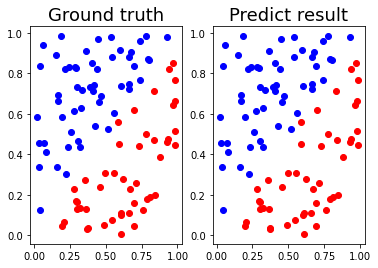

In [ ]:
# draw result picture
show_result(test_x, test_y, np.round(pred_y))

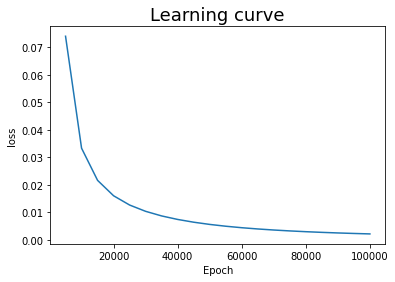

In [ ]:
# draw learning curve
show_learning_curve(loss_curve)

## 5 hidden units

In [ ]:
# hyperparameters
epoch_num = 100000
lr = 0.001

In [ ]:
# Train
# prepare data
train_x, train_y = generate_linear(100)
# create model
model = Model(hidden_dim=5)
loss_curve = []
start = time.time()

for epoch in range(epoch_num):
  # Forward pass
  pred_y = model.forward(train_x)
  # Backward pass
  loss, derivative_loss = model.CrossEntropyLoss(pred_y, train_y)
  model.backprop(derivative_loss)
  # Update weights
  model.update(lr)

  # print state
  if (epoch+1) % 5000 == 0:
    total_loss = np.sum(loss)/train_x.shape[0]
    loss_curve.append(total_loss)
    acc = model.accuracy(pred_y, train_y)
    train_time = int(time.time() - start)
    print(f'epoch {epoch+1:5d} loss: {total_loss:7.5f} accuracy: {acc:.2%} time: {train_time:3d} sec')

epoch  5000 loss: 0.05553 accuracy: 100.00% time:   0 sec
epoch 10000 loss: 0.02441 accuracy: 100.00% time:   1 sec
epoch 15000 loss: 0.01404 accuracy: 100.00% time:   2 sec
epoch 20000 loss: 0.00926 accuracy: 100.00% time:   3 sec
epoch 25000 loss: 0.00666 accuracy: 100.00% time:   4 sec
epoch 30000 loss: 0.00509 accuracy: 100.00% time:   5 sec
epoch 35000 loss: 0.00406 accuracy: 100.00% time:   6 sec
epoch 40000 loss: 0.00334 accuracy: 100.00% time:   7 sec
epoch 45000 loss: 0.00281 accuracy: 100.00% time:   8 sec
epoch 50000 loss: 0.00242 accuracy: 100.00% time:   9 sec
epoch 55000 loss: 0.00211 accuracy: 100.00% time:  10 sec
epoch 60000 loss: 0.00187 accuracy: 100.00% time:  11 sec
epoch 65000 loss: 0.00167 accuracy: 100.00% time:  12 sec
epoch 70000 loss: 0.00151 accuracy: 100.00% time:  13 sec
epoch 75000 loss: 0.00137 accuracy: 100.00% time:  14 sec
epoch 80000 loss: 0.00125 accuracy: 100.00% time:  15 sec
epoch 85000 loss: 0.00115 accuracy: 100.00% time:  16 sec
epoch 90000 lo

In [ ]:
# Test
test_x, test_y = generate_linear()
pred_y = model.forward(test_x)
acc = model.accuracy(pred_y, test_y)
print(f'Linear predict:\n{pred_y}')
print(f'Linear accuracy : {acc:.2%}')

Linear predict:
[[6.21113519e-07]
 [9.99997520e-01]
 [9.99999168e-01]
 [9.99999285e-01]
 [9.99752289e-01]
 [6.50648614e-07]
 [7.01772586e-07]
 [9.99998792e-01]
 [6.24817967e-07]
 [7.73764838e-07]
 [9.99999083e-01]
 [1.32013850e-05]
 [6.33363921e-07]
 [6.31025264e-07]
 [9.99999315e-01]
 [9.99999307e-01]
 [7.23454786e-07]
 [8.79974493e-06]
 [8.48792035e-07]
 [9.99998077e-01]
 [9.99995798e-01]
 [7.08931858e-07]
 [9.99999329e-01]
 [9.99999245e-01]
 [6.10914833e-01]
 [8.20317013e-01]
 [6.54266456e-07]
 [9.99999304e-01]
 [6.33985591e-07]
 [9.99999196e-01]
 [6.25759476e-07]
 [3.07405748e-06]
 [1.09216129e-03]
 [9.99999324e-01]
 [9.99999256e-01]
 [4.36259408e-06]
 [7.46170937e-07]
 [9.99979335e-01]
 [3.34835136e-04]
 [6.28167268e-07]
 [9.99999324e-01]
 [6.23814092e-07]
 [6.31606808e-07]
 [9.72396613e-01]
 [6.55183570e-07]
 [9.99999291e-01]
 [9.99999278e-01]
 [9.99999321e-01]
 [9.99999075e-01]
 [6.46785202e-07]
 [8.05435636e-07]
 [9.99999009e-01]
 [6.55243967e-07]
 [9.99971984e-01]
 [9.99871414

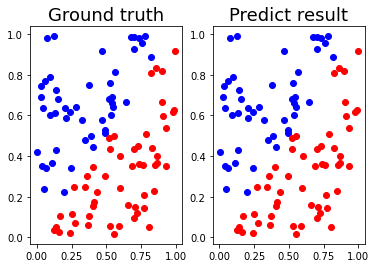

In [ ]:
# draw result picture
show_result(test_x, test_y, np.round(pred_y))

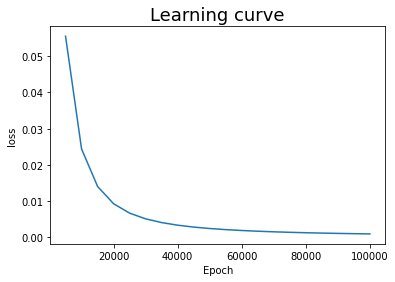

In [ ]:
# draw learning curve
show_learning_curve(loss_curve)

## without Activation function

In [48]:
# hyperparameters
epoch_num = 100
lr = 0.001

In [38]:
def normalize(arr):
  arr = arr.astype('float')
  minval = arr.min()
  maxval = arr.max()
  if minval != maxval:
    arr -= minval
    arr *= (1.0/(maxval-minval))
  return arr

In [49]:
# Train
# prepare data
train_x, train_y = generate_linear(100)
# create model
model = Model(ACT=None)
loss_curve = []
start = time.time()

for epoch in range(epoch_num):
  # Forward pass
  pred_y = model.forward(train_x)
  pred_y = normalize(pred_y)
  # Backward pass
  loss, derivative_loss = model.MSELoss(pred_y, train_y)
  model.backprop(derivative_loss)
  # Update weights
  model.update(lr)

  # print state
  if (epoch+1) % 10 == 0:
    total_loss = np.sum(loss)/train_x.shape[0]
    loss_curve.append(total_loss)
    acc = model.accuracy(pred_y, train_y)
    train_time = int(time.time() - start)
    print(f'epoch {epoch+1:5d} loss: {total_loss:7.5f} accuracy: {acc:.2%} time: {train_time:3d} sec')

epoch    10 loss: 0.13632 accuracy: 85.00% time:   0 sec
epoch    20 loss: 0.13559 accuracy: 85.00% time:   0 sec
epoch    30 loss: 0.13588 accuracy: 85.00% time:   0 sec
epoch    40 loss: 0.13643 accuracy: 84.00% time:   0 sec
epoch    50 loss:     nan accuracy: 0.00% time:   0 sec
epoch    60 loss:     nan accuracy: 0.00% time:   0 sec
epoch    70 loss:     nan accuracy: 0.00% time:   0 sec
epoch    80 loss:     nan accuracy: 0.00% time:   0 sec
epoch    90 loss:     nan accuracy: 0.00% time:   0 sec
epoch   100 loss:     nan accuracy: 0.00% time:   0 sec


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in matmul
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in subtract
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in multiply
  import sys


In [50]:
# Test
test_x, test_y = generate_linear()
pred_y = model.forward(test_x)
acc = model.accuracy(pred_y, test_y)
print(f'Linear predict:\n{pred_y}')
print(f'Linear accuracy : {acc:.2%}')

Linear predict:
[[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
Linear accuracy : 0.00%


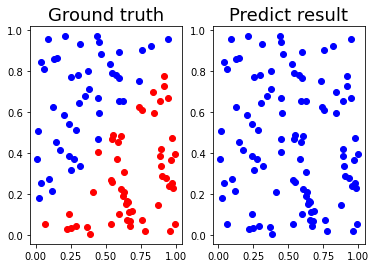

In [ ]:
# draw result picture
show_result(test_x, test_y, np.round(pred_y))

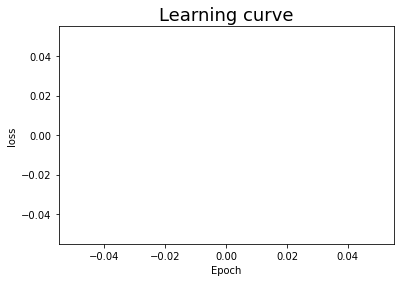

In [ ]:
# draw learning curve
show_learning_curve(loss_curve)

# Extra

## Differenet Activation Function

In [27]:
# hyperparameters
epoch_num = 100000
lr = 0.001

In [33]:
# Train
# prepare data
train_x, train_y = generate_linear(100)
# create model
model = Model(ACT='tanh')
loss_curve = []
start = time.time()

for epoch in range(epoch_num):
  # Forward pass
  pred_y = model.forward(train_x)
  # pred_y: (-1, 1) => (0, 1)
  pred_y = (pred_y+1) / 2
  # Backward pass
  loss, derivative_loss = model.MSELoss(pred_y, train_y)
  model.backprop(derivative_loss)
  # Update weights
  model.update(lr)

  # print state
  if (epoch+1) % 5000 == 0:
    total_loss = np.sum(loss)/train_x.shape[0]
    loss_curve.append(total_loss)
    acc = model.accuracy(pred_y, train_y)
    train_time = int(time.time() - start)
    print(f'epoch {epoch+1:5d} loss: {total_loss:7.5f} accuracy: {acc:.2%} time: {train_time:3d} sec')

epoch  5000 loss: 0.00327 accuracy: 100.00% time:   0 sec
epoch 10000 loss: 0.00089 accuracy: 100.00% time:   1 sec
epoch 15000 loss: 0.00043 accuracy: 100.00% time:   2 sec
epoch 20000 loss: 0.00026 accuracy: 100.00% time:   3 sec
epoch 25000 loss: 0.00018 accuracy: 100.00% time:   4 sec
epoch 30000 loss: 0.00014 accuracy: 100.00% time:   5 sec
epoch 35000 loss: 0.00011 accuracy: 100.00% time:   6 sec
epoch 40000 loss: 0.00009 accuracy: 100.00% time:   7 sec
epoch 45000 loss: 0.00008 accuracy: 100.00% time:   8 sec
epoch 50000 loss: 0.00007 accuracy: 100.00% time:   8 sec
epoch 55000 loss: 0.00006 accuracy: 100.00% time:   9 sec
epoch 60000 loss: 0.00005 accuracy: 100.00% time:  10 sec
epoch 65000 loss: 0.00005 accuracy: 100.00% time:  11 sec
epoch 70000 loss: 0.00004 accuracy: 100.00% time:  12 sec
epoch 75000 loss: 0.00004 accuracy: 100.00% time:  13 sec
epoch 80000 loss: 0.00004 accuracy: 100.00% time:  14 sec
epoch 85000 loss: 0.00003 accuracy: 100.00% time:  15 sec
epoch 90000 lo

In [34]:
# Test
test_x, test_y = generate_linear()
pred_y = model.forward(test_x)
pred_y = (pred_y+1) / 2
acc = model.accuracy(pred_y, test_y)
print(f'Linear predict:\n{pred_y}')
print(f'Linear accuracy : {acc:.2%}')

Linear predict:
[[8.40966186e-12]
 [8.96333008e-12]
 [1.80925415e-06]
 [8.01296252e-11]
 [1.02329811e-11]
 [9.61819513e-12]
 [2.77340373e-11]
 [1.09078302e-11]
 [8.81550388e-12]
 [6.81231738e-11]
 [1.16779364e-11]
 [9.07374176e-12]
 [8.77337092e-12]
 [1.00000000e+00]
 [1.00000000e+00]
 [8.48437987e-12]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [7.93742849e-12]
 [6.45071924e-09]
 [7.92999000e-12]
 [9.93946186e-01]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.13121179e-11]
 [1.49081691e-10]
 [9.96098204e-11]
 [9.42166900e-11]
 [1.00000000e+00]
 [8.17407253e-12]
 [1.80964133e-11]
 [1.00000000e+00]
 [6.49106879e-11]
 [8.06449352e-12]
 [1.00000000e+00]
 [6.23117126e-06]
 [1.00000000e+00]
 [3.02824432e-11]
 [2.32368014e-11]
 [7.67045033e-09]
 [9.99980792e-01]
 [9.32814936e-12]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.38106850e-08]
 [2.52600290e-07]
 [2.25482411e-11]
 [1.05698783e-11]
 [1.00000000e+00]
 [1.15076282e-11]
 [1.00000000

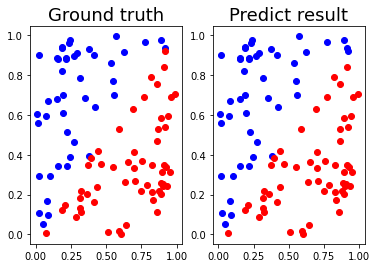

In [35]:
# draw result picture
show_result(test_x, test_y, np.round(pred_y))

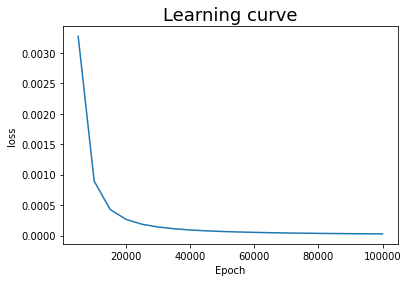

In [36]:
# draw learning curve
show_learning_curve(loss_curve)